In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [48]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/LinearRegression/Code/placement.csv')

In [49]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [50]:
print(f"Total Number of rows: {df.shape[0]}")
print(f"Total Number of columns: {df.shape[1]}")

Total Number of rows: 200
Total Number of columns: 2


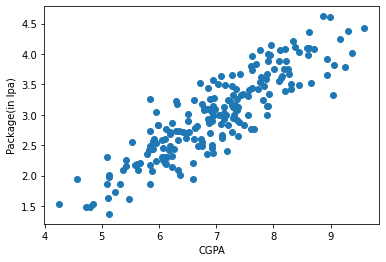

In [51]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')
plt.show()

In [52]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [53]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
lr = LinearRegression()

In [57]:
lr.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

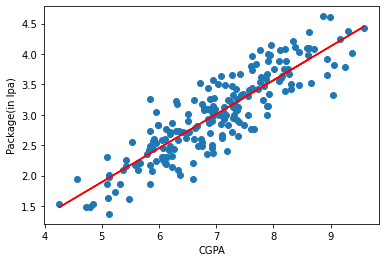

In [59]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [60]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [61]:
y_pred = lr.predict(X_test)

In [62]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [63]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [64]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [65]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [66]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.780730147510384


In [34]:
# Adjusted R2 score

In [35]:
# Total number of rows = 40
# Total number of features = 1

(40, 1)

In [67]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

### Adding random feature

In [68]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.155209,3.26
1,5.12,0.740383,1.98
2,7.82,0.810635,3.25
3,7.42,0.444150,3.67
4,6.94,0.278236,3.57


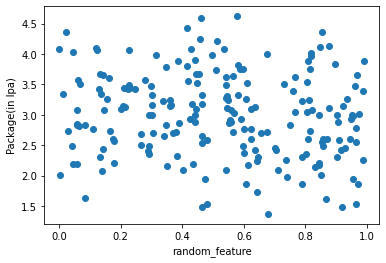

In [69]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')
plt.show()

In [70]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [72]:
lr = LinearRegression()

In [73]:
lr.fit(X_train,y_train)

LinearRegression()

In [74]:
y_pred = lr.predict(X_test)

In [75]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7810819724904224


- R2 score increaes even with the addition of unrelevant column.
- That's why we can depends on R2 score.

In [76]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7692485655980128

- Adjusted R2 Score decreases after adding unrelevant column

## Adding relevant or related column

In [77]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [78]:
new_df2.sample(5)

,cgpa,iq,package
47,5.84,2.46,3.26
150,6.30,2.03,2.73
127,6.78,3.61,3.11
169,9.31,4.67,4.37
113,6.94,2.07,2.37


Text(0, 0.5, 'Package(in lpa)')

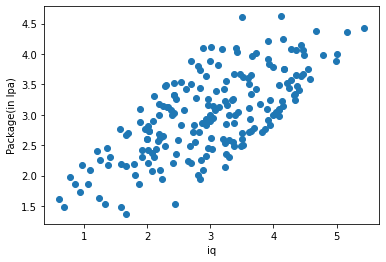

In [79]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [81]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [82]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [83]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [84]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.826317639115491


- R2 score increases after adding relevant column

In [85]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.816929403392004

- Adjusted R2 score also increases after adding relevant column